# 질문 주세요.
### 대부분이 준비 되어있습니다 :)

## [Spotify API 관련]
----
### Q. 매번 Spotify API를 호출하면 무리가 있지 않나?
API를 최대한 호출하지 않게 하기 위해서 음악검색, 음악추천 API와 같이 Spotify의 기능이 껴있는 API들은 제외하고, audio-features, 가수별 장르정보와 같이 일반적인 데이터 정보를 받아오는 API는 SeedZone Database에 사용자가 추천음악 프로세스에 사용한 음악들의 정보를 쌓아놓듯이, audio-features, 가수별 장르정보는 MuLetter 내부 Database에 저장시킬 예정입니다.

### Q. 어떤 것을 토대로 저 추천음악들이 사용자를 위한 추천음악들이라고 말할 수 있나요?
일단 스포티파이라는 회사의 이야기부터 해드릴게요. 스포티파이는 음악 스트리밍 플랫폼들 중에서 추천서비스에 특화되어 있는 플랫폼 입니다. 우리 나라의 대표적인 플랫폼 중 하나인 FLO에서도 Spotify의 추천시스템을 칭찬하는 글을 작성했을 정도에요.<br/>
그 글을 보게되면 스포티파이라는 회사가 추천 서비스에 엄청난 투자를 진행하고 있다는 것을 확인할 수 있어요. 데이터 가공에 힘을 쓰고, 매년 데이터 관련된 많은 논문들을 발표하고, 데이터를 잘 다루는 회사를 인수하는 등 같은 것들을 스포티파이에서 진행하고 있습니다.<br/>
이런 배경들이 깔려서 스포티파이에서 제공해주는 하이레벨 오디오 분석 데이터에 신뢰성을 보장한 상태로 진행한 것이 MuLetter 입니다. 추천을 잘 하기로 유명한 Spotify가 추천해준 음악들을 저희는 서드파티의 역할로 알짜배기만 골라 필터링을 해서 사용자에게 제공을 해드리는 것 이니까요. 오디오 분석 데이터 상으로는 사용자를 위한 추천음악들이라고 말할 수 있습니다.<br/>
또한 사용자가 우체통을 어떻게 구성하느냐에 따라 추천 음악들의 구성도 바뀔 테니까요. MuLetter에서는 사용자가 자신의 취향을 얼마나 잘 반영되게 우체통을 만들었느냐도 자신이 찾고 싶은 음악들을 얻어내는 방법입니다.

## [KMeans Based Recommender 관련]
----
### Q. KMeans++ 초기 중심값 선정 방식
KMeans++ 알고리즘은 초기 중심값은 무작위로 선정하고, 이후에는 거리비례확률을 이용합니다.<br/>
다음 중심값을 선정하기 위해 초기 중심값으로 선정된 데이터셋들과 훈련에 사용될 데이터셋들의 거리를 측정하고,
각 각의 데이터셋 별로 가장 가까운 초기 중심값의 거리를 저장합니다.

여기서 해당 거리가 가장 먼 데이터셋을 그 다음 중심값으로 선정합니다.
가까운 클러스터와의 거리가 가장 먼 데이터가 중심값이 되었을 때, 중심값들 간의 이격도가 가장 멀 확률이 있다라는 가정하에 진행하는 방법입니다.

### Q. 많은 클러스터링 알고리즘 중에 왜 KMeans Clustering을 채택했나? or ECV 관련 질문
장점에서도 언급했듯이 사이킷런의 의존도를 없앨 수 있다는 점에서 채택했습니다. 그리고 장점의 연장선으로 말씀드렸던게 ECV라는 품질평가를 사용했다라는 점 인데요. 저희 추천 시스템에서 클러스터링 알고리즘은 필터링의 역할만 수행하기 때문에 평가 수치 자체가 그렇게 중요하지 않아요.<br/>
근데 ECV는 사이킷런에서 제공하지 않는 품질평가 방식입니다. 직접 구현했기 때문에 라이브러리에서 지원하지 않는 방식을 도입할 수 있었고,<br/> 저희는 남길 수 있는 프로젝트를 진행하자가 공동의 목표인데, KMeans Process를 이해하고 직접구현할 수 있다는, 넓은 의미로 풀어내면 알고리즘의 대한 저희들의 이해도를 남기면 좋을 거 같아서 클러스터링 알고리즘 중에 가장 쉬운 KMeans Clustering을 채택했습니다.

### Q. 추천 음악은 한번만 제공이 되는가?
발표 시간 상 내용에는 넣지 않았는데요. 편지 UI에 좋아요 표시가 붙게될거에요. 사용자는 자신이 받은 추천음악 플레이리스트에서 마음에 들었던 음악들에 좋아요를 눌러서 MuLetter 시스템에게 답장을 해주면 MuLetter 시스템은 사용자가 좋아요를 누른 음악을 토대로 추천음악프로세스를 다시 진행하고, 사용자에게 새 편지를 작성해줍니다.

## [통합 방식 관련]
----
### Q. [SeedZone] SeedZone Observer는 관리자가 실행시키는 것 인가?
##### 아닙니다.
SeedZone Observer에 Observer를 붙여서 네이밍 한 것에는 이유가 있습니다. 사용자들이 우체통을 등록하거나 편지에 답장을 해주면 SeedZone Database에 추천 프로세스에 쓰일 음악을 넣는 과정에서 SeedZone Observer가 SeedZone Database에 있는 Seed 음악수를 체크합니다.<br/>
그리고 앞서 발표했던 KMeans Based Recommender에서 Rule of Thumb 수식으로 K개수를 선정했는데, 음악이 계속 추가되어 Rule of Thumb 수식에 의해 기존 SeedZone Clustering 정보보다 많은 수의 K를 만들어낼 수 있으면 SeedZone Clustering이 동작합니다.<br/>
추가적으로 음악이 계속 추가될 때 새로 추가된 음악에게 현재 SeedZone Clustering 정보를 토대로 라벨을 부여해주는데, 이 과정에서 ECV도 계속해서 업데이트 시킵니다. SeedZone Observer는 ECV 수치가 많이 낮아졌을 때, 그 때에도 SeedZone Clustering을 동작 시킵니다.<br/>
<br/>
추가적으로 SeedZone 클러스터링 작업이 진행될 때마다 프로세스가 종료되면 모든 Coord Generator에게 새로운 클러스터링 정보의 생성을 알리고 Coord Generator는 모든 우체통들의 좌표를 새 Clustering 정보에 맞춰서 재 부여 합니다.

### Q. [SeedZone] 매번 업데이트 되는 SeedZone Clustering 정보
우체통 좌표부여 기능은 SeedZone Observer가 Rule of Thumbs에 의한 새로운 K 추가 가능, ECV 평가 저하와 같은 조건에서 스스로 Clustering을 동작시키고, Coord Generator에게 모든 우체통의 좌표를 다시 부여해라 라는 식으로 동작하는 식으로 최신버전의 Clustering 정보를 반영시킵니다.<br/>
여기서 우체통의 좌표들이 다시 부여되는 점은 전혀 불편한 요소라고 생각하지 않아요. 저는 오히려 재밌는 요소라고 생각하거든요. 사용자들이 MuLetter의 우체통 세계관을 만들어주는 의미가 되니까요. <br/>
추가적으로 SeedZone Observer 동작조건에서 Rule of Thumbs의 수식 특성 상 노래 수 나누기 2, 제곱근, 제곱근이 붙기 때문에 서비스 초기에는 SeedZone Observer가 자주 동작할 수 있지만 K의 개수가 늘어갈수록 새로운 K의 발생을 감지하려면 더욱 많은 노래가 들어와야 할 거에요. 그래서 문제가 되는 요소라고는 생각하지 않습니다.<br/>

### Q. [CoordGenerator] 클러스터링 라벨들은 뒤죽박죽인데 어떻게 Coord Generator가 만들어내는 좌표가 어떻게 우체통들의 음악성향을 나타낸다고 할 수 있는가?
SeedZone Observer가 하는 클러스터링 작업에는 정렬작업이 붙습니다.<br/>
이 정렬 메커니즘은 클러스터 중심값들 중에 가장 전체 중심값들과 유사한 클러스터를 0도에 배치하고 양쪽 각도에 해당 클러스터와 유사한 클러스터, 그리고 다음 라운드에서는 이전 각도로 도출된 클러스터들과 유사한 클러스터, 이러한 방식으로 원을 그려갑니다. <br/>
작업이 끝나면 결과적으로 0도에 배치되었던 클러스터 중심값과 반대쪽에 배치되어 있는 클러스터 중심값들은 많이 다른 형태를 띄게 되는 거죠.

### Q. [CoordGenerator] Coord Generator 동작조건
새로운 우체통이 등록되거나, 편지 답장으로 우체통의 Seed 음악의 구성이 변경되었을 때, Coord Generator가 현재 MuLetter System의 SeedZone Clustering 결과를 토대로 우체통에 좌표를 부여합니다.

### Q. [Etc] 해당 추천 프로그램을 어떻게 탑재할건가? <br/> 추천 프로세스가 오래걸릴텐데 사용자한테는 어떻게 제공해줄 것 인가?
백엔드 서버와 머신러닝 서버는 node js로 구현이 될것입니다. 그렇다고 해당 프로그램을 javascript로 바꾸지는 않을 거구요. 자바스크립트에 child-process라는 라이브러리가 있는 데 그것을 통해 파이썬 프로그램을 실행시킬 거에요. 연동의 개념이 아니고, 아예 프로그램을 실행시키는 개념으로 접근하는 거죠.
그리고 파이썬 프로그램에서 추천 프로세스가 종료되면 백엔드 서버에 종료 API를 호출할 겁니다. 이 때 어떤 우체통에 대한 편지 작성이 끝났는지와 같은 정보가 Body에 담기겠죠?<br/>

여기서 오래걸리는 면에 있어서는 소켓을 사용할 겁니다. 백엔드 서버에 종료 API가 호출될 때 해당 우체통이 어떤 사용자의 우체통인지를 확인하고 해당 사용자의 소켓 아이디를 조회하여 프론트엔드에 알림이 뜨도록 할 거에요.

### Q. [CoordGenerator] Coord Generator가 클러스터 성향을 좌표계로 변환시키는 과정을 자세하게 설명?

                  trackId                         trackName  \
0  7tIOwGFRTM08JdAeKOELGp                         Blue room   
1  4Nd7PP3Qnuwjb72dNkbE2f  아마두 (feat. 우원재, 김효은, 넉살 & 허클베리피)   
2  3w9HSuLDejveVS9G8Qj8i0              Beer (Prod.Way Ched)   
3  02SbQgZbzMoylPoGr32ugF                             Drama   
4  4LYlWqZSPaLMk9FthWF0To                Memorize Our Night   

                artistIds      artistNames  \
0  3rxeQlsv0Sc2nyYaZ5W71T       Chet Baker   
1  0LyfQWJT6nXafLPZqxe9Of  Various Artists   
2  0LyfQWJT6nXafLPZqxe9Of  Various Artists   
3  3HqSLMAZ3g3d5poNaI7GOU               IU   
4  7c1HgFDe8ogy5NOZ1ANCJQ  Car, the garden   

                                               image  
0  https://i.scdn.co/image/ab67616d0000b273e844e3...  
1  https://i.scdn.co/image/ab67616d0000b27363ee23...  
2  https://i.scdn.co/image/ab67616d0000b27388875b...  
3  https://i.scdn.co/image/ab67616d0000b2730d378c...  
4  https://i.scdn.co/image/ab67616d0000b27383fc7e...  


사용자에 우체통에는 이런 노래들이 등록되어 있어요. 그리고 이들은 모두 **추천 프로세스에 한 번씩 사용이 됐었기 때문에 SeedZone Database**에 들어있을테구요. 이 음악들이 **SeedZone Observer의 클러스터링 대상**이 됩니다.

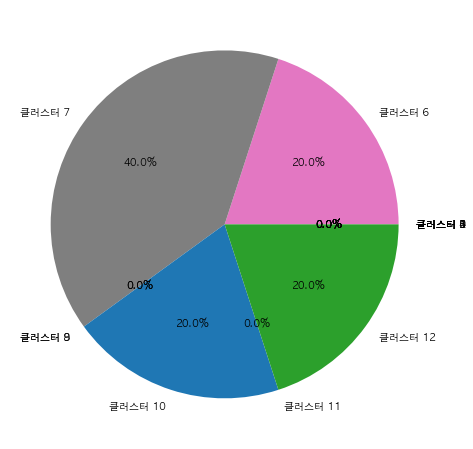

그러면 사용자가 가지고 있는 총 음악 개수에 각 라벨 숫자들을 그룹화하여 각 각의 클러스터 성향으 수를 나눠주면 사용자가 어느 성향의 음악들을 가지고 있는지 비율적으로 알 수 있겠죠?

성향 0의 개수: 9
좌표 생성에 쓰일 값 개수: 4
[[-33.93495421 -38.13665493]
 [ -9.57262657 -38.8376727 ]
 [-19.85417748   2.41073361]
 [ -9.29446344  17.70912051]]


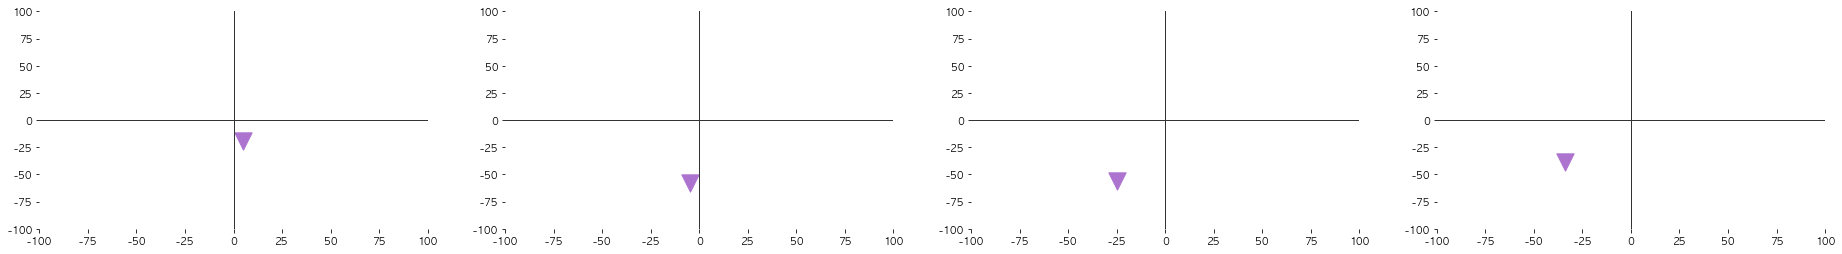

여기서 클러스터 성향을 각도로, 그리고 비율을 거리로 사용하여 이를 사분면에 나타낸다면 각 클러스터 성향의 각도쪽으로 직선거리상으로는 어떻게 가야할까에 대한 변환을 해줍니다.<br/>그리고 이들을 모두 합해주면 됩니다. 

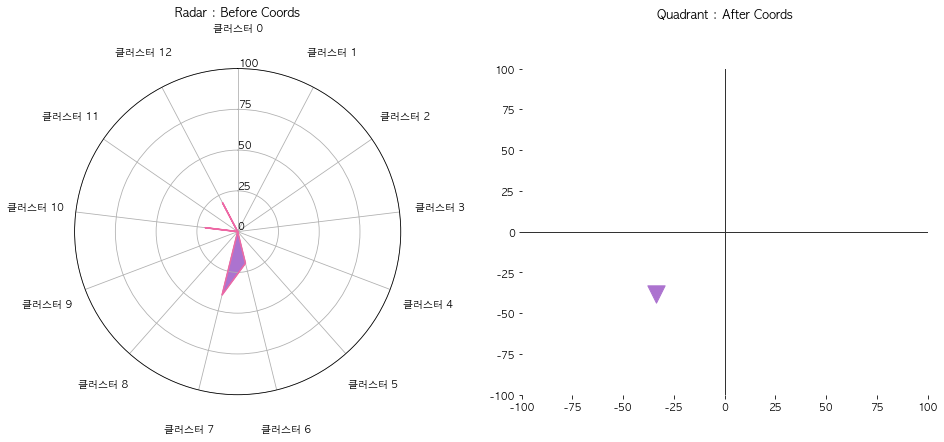

In [2]:
from demo import QA

QA.view()

## [Etc]
----
### Q. 추천 음악은 재생할 수 있나요?
네 재생할 수 있는 스트리밍 기능을 넣을겁니다.<br/>
하지만 안타깝게도 스포티파이에서 제공해주는 스트리밍 API를 이용할 것 이기 때문에 스포티파이 요금제에 가입된 사용자들만 사용할 수 있어요. 이것은 사용자의 스포티파이 계정과의 연동을 통해 구현할 것 이구요.<br/>
그렇지 않은 사용자들에게는 아쉬운대로 유튜브 검색 링크라도 제공할 예정입니다.

### Q. Web Prototype은 아예 구현이 안된건가요?
사실 Web Prototype이 애초에 구현이 되었어요.근데 설계가 탄탄히 안된 상태에서 진행을 한 Prototype이다 보니, 스스로 마음에 많이 안들더라구요. 그래서 Prototype을 갈고, 프로젝트 분석 설계라는 과목의 취지에 맞게 설계를 탄탄하게 하고, 2학기 때 만족스러운 작품을 만들자. 해서 이번 시연은 Jupyter Notebook으로만 진행했습니다.

**원하신다면 과거에 만들어진 Web Prototype도 지금 보여드릴 수 있습니다.**